# Seaborn 라이브러리

seaborn은 matplotlib이 기능과 스타일을 확장한 파이썬 시각화 도구의 고급버전.

In [1]:
# 데이터셋 가져오기
import seaborn as sns
titanic = sns.load_dataset('titanic')

print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

## 회귀선이 있는 산점도

regplot()함수는 서로 다른 2개의 연속 변수 사이의 산점도를 그리고 선형회귀에 의한 회귀선을 함께 나타낸다.

- fit_reg = False 옵션을 설정하면 회귀선을 안 보이게 할 수 있다.

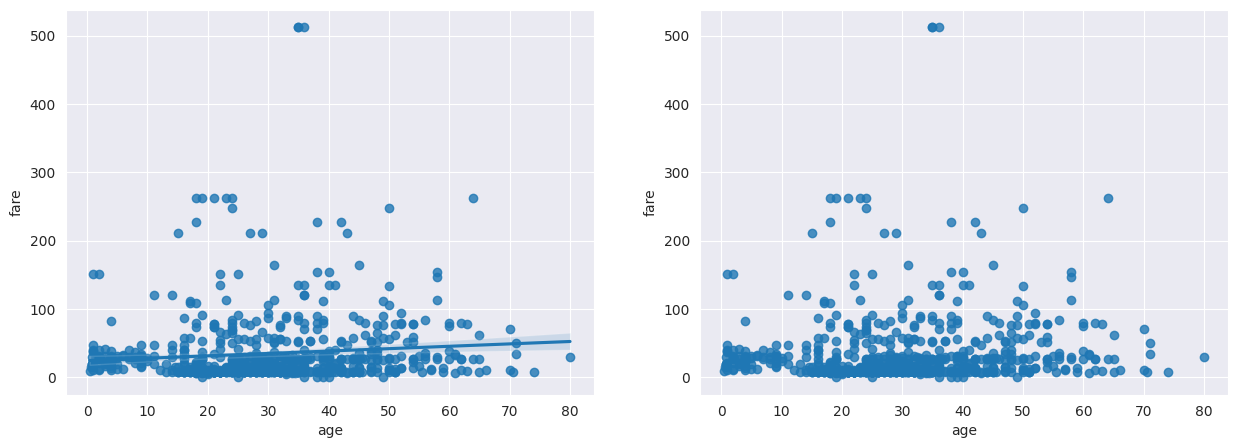

In [4]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('darkgrid')

# 그래프 객체 생성
fig = plt.figure(figsize =(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 그래프 그리기
sns.regplot(x='age',
            y='fare',
            data = titanic,
            ax=ax1)

sns.regplot(x='age',
            y='fare',
            data= titanic,
            ax=ax2, fit_reg=False #회귀선 미표시
)
plt.show()

##히스토그램/커널 밀도 그래프

단변수 데이터의 분포를 확인할 때 distplot() 함수 사용. 기본값으로 히스토그램과 커널밀도함수를 그래프로 출력.

<ipython-input-5-41fb900e0e23>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'], ax= ax1)


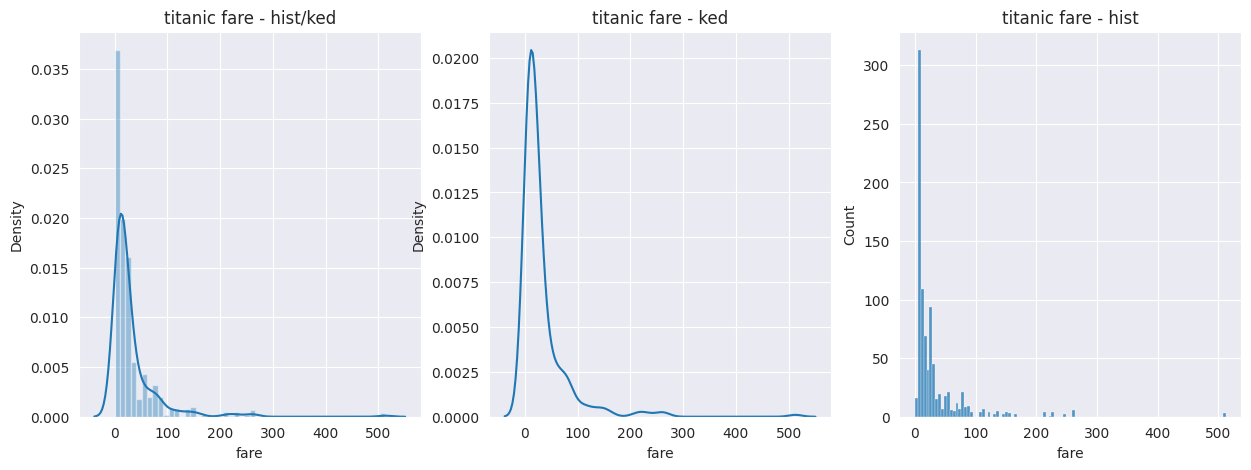

In [5]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# distplot
sns.distplot(titanic['fare'], ax= ax1)
# kdeplot
sns.kdeplot(x='fare', data= titanic, ax=ax2)
#histplot
sns.histplot(x='fare', data=titanic, ax=ax3)

ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

타이타닉 운임의 분포를 그리면, 대부분 100달러 미만에 집중되어 있다.

## 히트맵

2개의 범주형 변수를 x,y축에 놓고 데이터를 매트릭스 형태로 분류한다.

aggfunc='size' 옵션은 데이터 값의 크기를 기준으로 집계한다는 뜻.

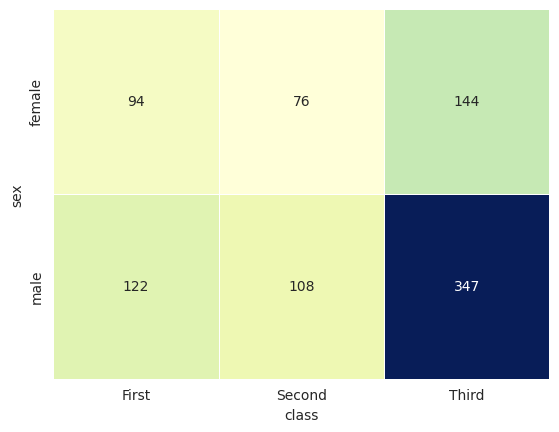

In [6]:
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

sns.heatmap(table,
            annot=True, fmt='d',
            cmap='YlGnBu',
            linewidth=.5,
            cbar=False)

plt.show()

히트맵의 결과 여성 승객보다 남자 승객이 상대적으로 많은 것을 알 수 있으며 특히 3등석 남성 승객의 수가 많은 것을 알 수 있었다.

cbar=False : 컬러바 미표시

cbar = True : 컬러바 표시

## 범주형 데이터의 산점도

stripplot() & swarmplot() 사용 가능.

swarmplot() 은 데이터의 분산도 고려, 데이터 포인트가 서로 중복되지 않게 그려 데이터가 퍼져있는 정도를 입체적으로 볼 수 있음.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


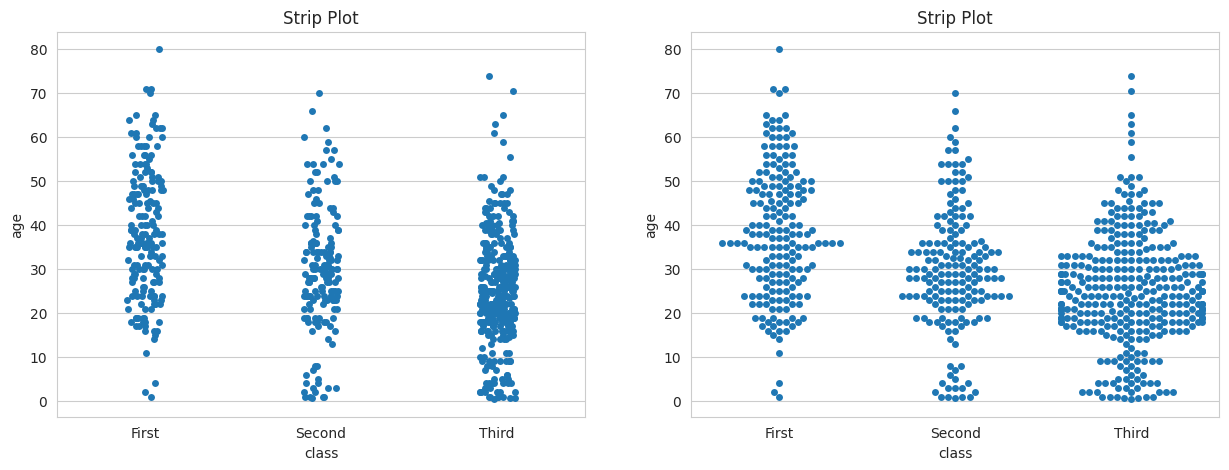

In [7]:
sns.set_style('whitegrid') # 스타일 테마 설정

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(x='class',
              y='age',
              data=titanic,
              ax=ax1)

sns.swarmplot(x='class',
              y='age',
              data=titanic,
              ax=ax2)

ax1.set_title('Strip Plot')
ax2.set_title('Strip Plot')

plt.show()

hue='sex' 옵션을 추가하면 , 'sex' 열의 데이터 값인 남녀 성별을 색상으로 구분해 출력.

## 막대 그래프

barplot() 함수 : 막대 그래프 그림

Text(0.5, 1.0, 'titanic survived - sex/class(stacked)')

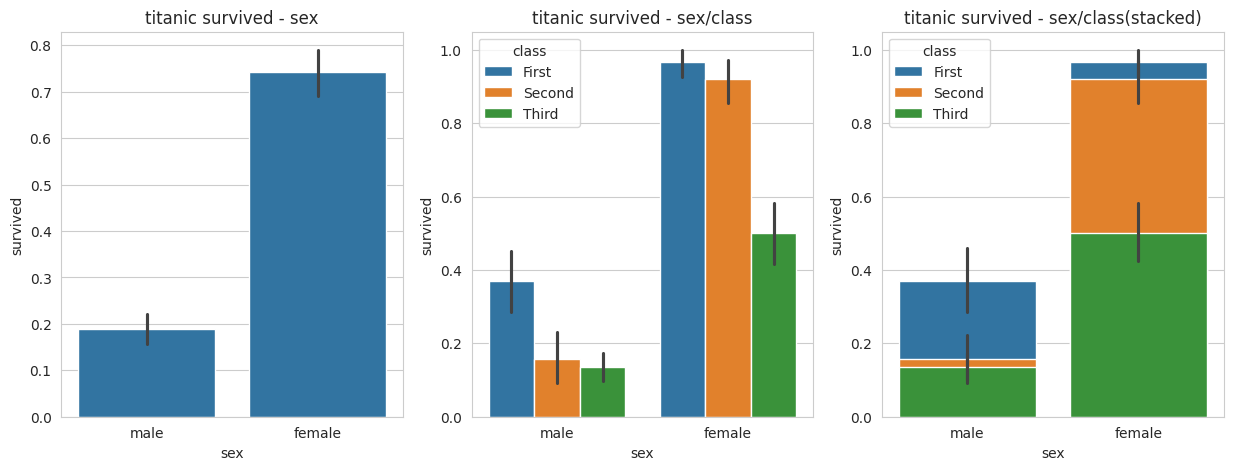

In [8]:
# 그래프 객체 생성
fig= plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2) # hue 옵션 추가

sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)

# 차트 제목
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')



## 빈도 그래프

couterplot() : 데이터의 개수를 막대 그래프로 나타냄.

기본설정 -> hue 옵션 추가 -> 축방향으로 분리하지 않고 위로 쌓아 올리는 누적그래프로 출력

palette 옵션 : 그래프 색 구성 다르게

In [11]:
sns.countplot(x='class', hue='class',palette='Set1', data=titanic, ax=ax1)

#hue 옵션에 who 추가
sns.countplot(x='class', hue='who',palette='Set2', data=titanic, ax=ax2)

# dodge=False 옵션 추가 (축 방향으로 분리 X, 누적 그래프)
sns.countplot(x='class', hue='who',palette='Set3',dodge=False, data=titanic, ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - wo(stacked)')

plt.show()


# 박스 플롯. 바이올린 그래프

박스 플롯 : 범주형 데이터 분포 + 주요 통계 지표 함께 제공

-> 분산 알기 어려움

-> 커널 밀도 함수 그래프를 y축에 추가 : 바이올린 그래프

boxplot() : 박스플롯 그리기 /
violinplot() : 바이올린 그래프

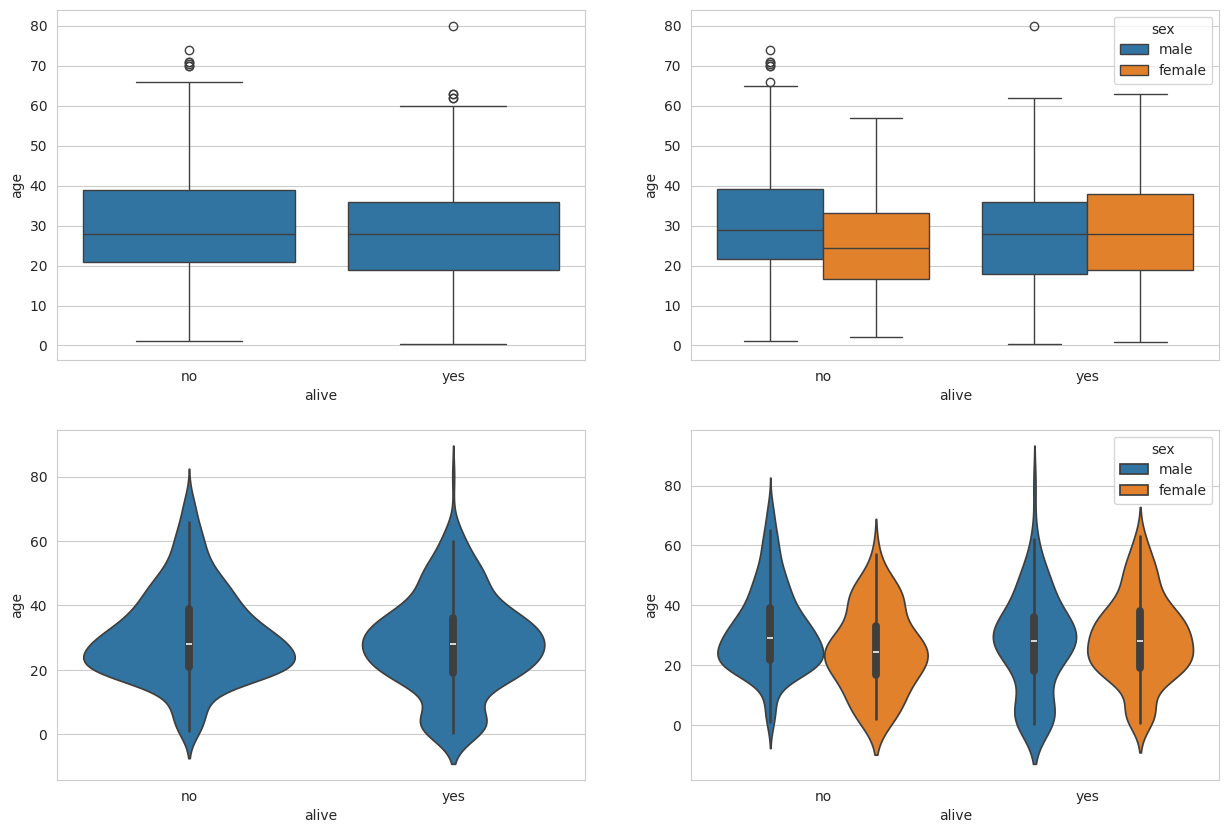

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('whitegrid')

# 그래프 객체 생성
fig= plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(x='alive', y='age', data= titanic, ax=ax1)
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2) # hue 추가
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)
sns.violinplot(x='alive', y='age', hue= 'sex', data=titanic, ax=ax4)

plt.show()

# 조인트 그래프

산점도를 기본으로 표시, x-y축에 각 변수에 대한 히스토그램을 동시에 보여줌

-> 두 변수의 관계와 데이터의 분산 정도 파악 유리

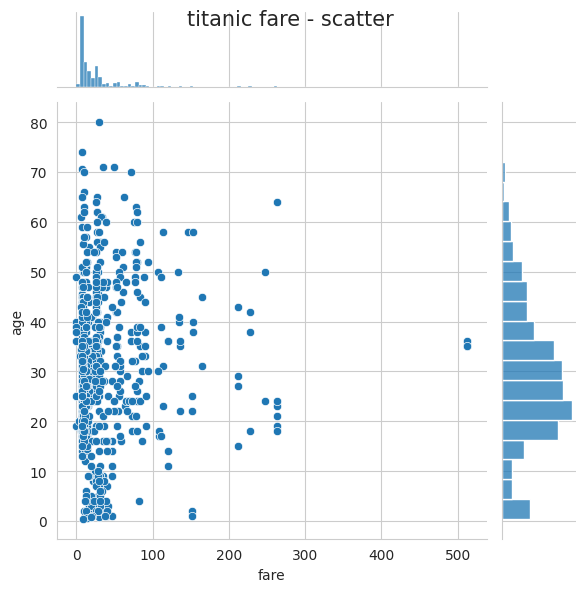

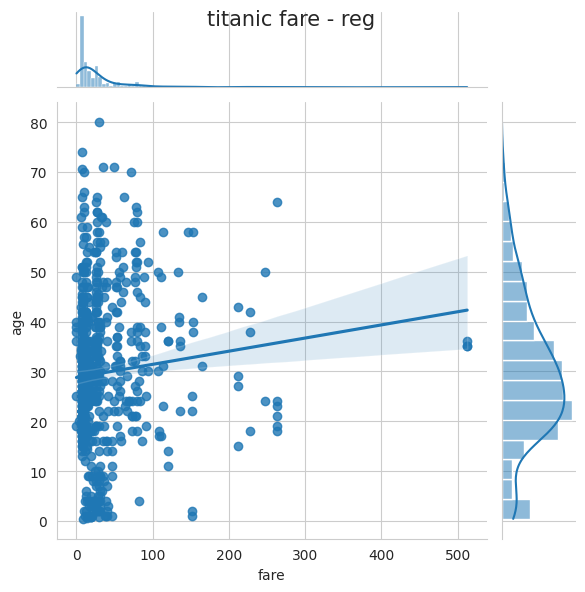

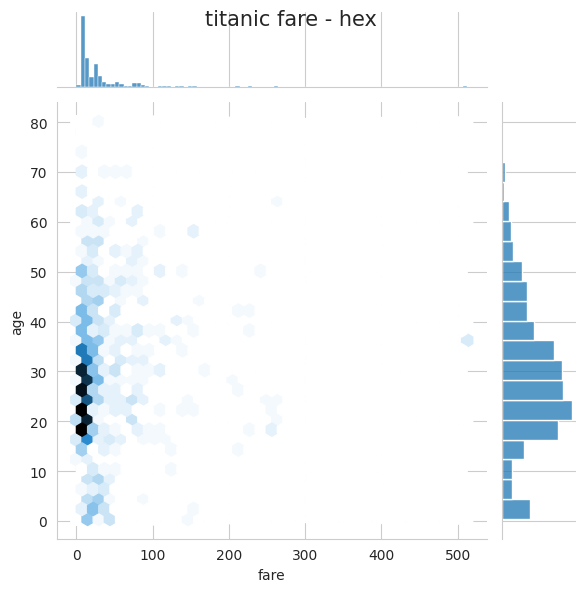

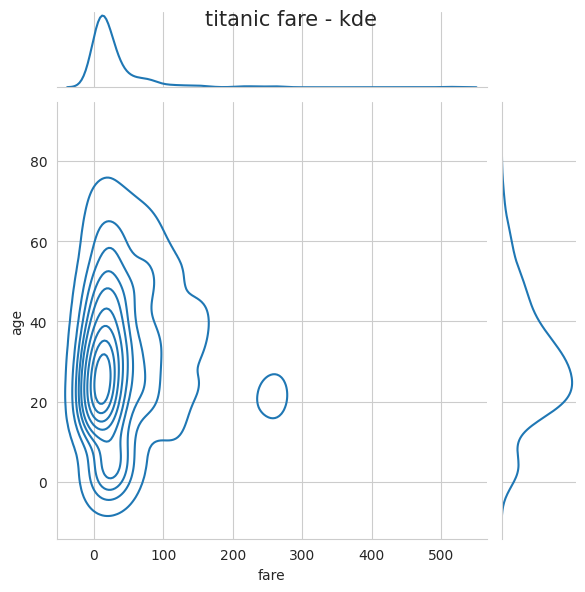

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('whitegrid')

j1 = sns.jointplot(x='fare', y='age', data=titanic)

j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic)

j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic)

j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic)

j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()

## 조건을 적용해 화면을 그리드로 분할

FacetGrid() 함수는 행, 열 방향으로 서로 다른 조건을 적용해 여러 개의 서브 플롯 만듬.

각 서브 플롯에 적용할 그래프 종류를 map() 메소드 이용해 그리드 객체에 전달.

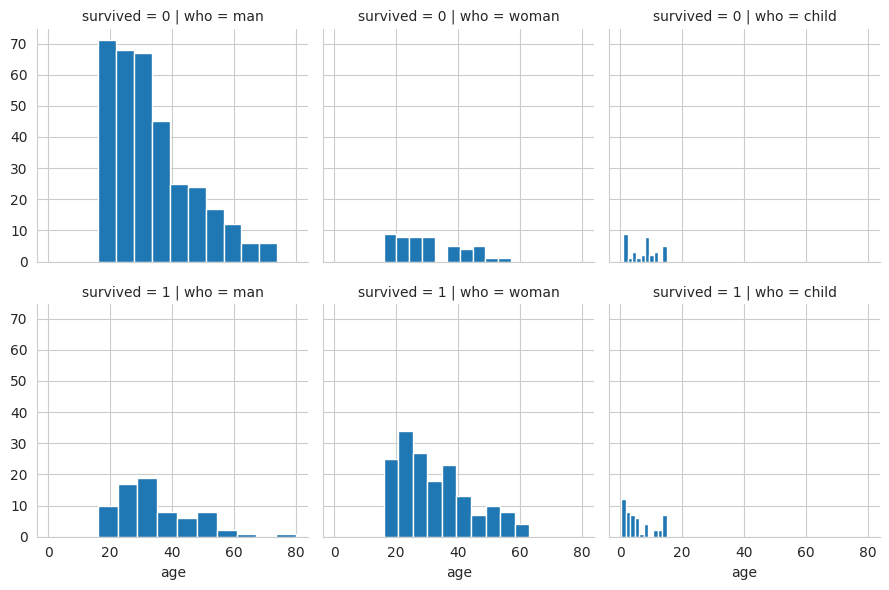

In [14]:
g= sns.FacetGrid(data=titanic, col='who', row='survived')
g= g.map(plt.hist,'age')

age 열의 나이를 기준으로 히스토그램을 그린 결과, 남성에 비해 여성 생존자가 상대적으로 많고 성인 중에선 20 ~ 40대의 생존자가 많다.

## 이변수 데이터의 분포

pairplot() 함수는 인자로 전달되는 데이처프레임의 변수를 두 개씩 짝지을 수 있는 모든 조합에 대해 표현

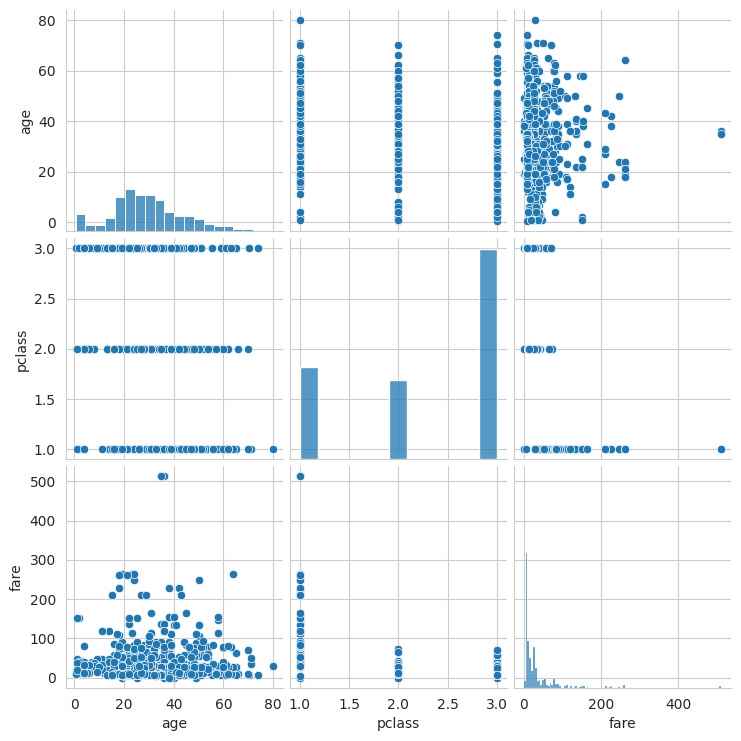

In [15]:
titanic_pair = titanic[['age','pclass','fare']]

g= sns.pairplot(titanic_pair)

## Folium 라이브러리

지도 위에 시각화 할 때 유용한 도구.

Map() 함수를 이용해 간단히 지도 객체를 만들 수 있음.

In [18]:
import folium

seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)

seoul_map.save('./seoul.html')

In [20]:
# 지도 스타일 적용
import folium

seoul_map2 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain',
                        zoom_start=12)
seoul_map3 = folium.Map(location=[37.55,126.98], tiles='Stamen Toner',
                        zoom_start=15)

seoul_map2.save('./seoul2.html')
seoul_map3.save('./seoul3.html')

## 지도에 마커 표시

Marker() 함수에 위도 경도 정보 전달

popup 옵션 추가로 팝업창에 표시해주는 텍스트 삽입 가능

In [22]:
import pandas as pd
df = pd.read_excel('./서울지역 대학교 위치.xlsx', engine='openpyxl')

seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain',
                       zoom_start=12)

for name, lat, lng in zip(df.index, df.위도, df.경도):
  folium.Marker([lat, lng], popup=name).add_to(seoul_map)

seoul_map.save('./seoul_colleges.html')

FileNotFoundError: [Errno 2] No such file or directory: './서울지역 대학교 위치.xlsx'

In [23]:
for name, lat, lng in zip(df.index, df.위도, df.경도):
  folium.CircleMarker([lat, lng],
                      radius=10,
                      color='brown',
                      fill=True,
                      fill_color= 'coral',
                      fill_opacity=0.7,
                      popup=name).add_to(seoul_map)

seoul_map.save('./seoul_colleges2.html')

NameError: name 'df' is not defined

## 지도 영역에 단계구분도 표시

In [24]:
import pandas as pd
import folium
import json

file_path
df= pd.read_excel(file_path, index_col='구분', engine = 'openpyxl')
df.columns = df.columns.map(str)

geo_path ='./경기도행정구역경계.json'
try :
  geo_data = json.load(open(geo_path, encoding ='utf-8'))
except :
  geo_data = json.load(open(geo_path, encoding='utf-8-sig'))

g_map = folium.Map(location=[37.5502, 126.982],
                   tiles='Stamen Terrain', zoom_start=9)

year='2007'

folium.Choropleth(geo_data=geo_data, data=df[year],
                  columns=[df.index, df[year]],
                  fill_color='Y1OrRd', fill_opacity = 0.7, line_opacity=0.3,
                  threshold_scale = [10000, 100000, 300000, 500000, 700000],
                  key_on='feature.properties.name').add_to(g_map)

  g_map.save('./gyonggi_population_', + year +'.html')

IndentationError: unexpected indent (<ipython-input-24-57e552e7a564>, line 26)